# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Preprocessing

In [7]:
### Exploring the descriptive statistics of the variables
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
# NA count
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Exploratory Data Analysis (EDA)

In [9]:
# encoding object column
from sklearn.preprocessing import LabelEncoder
temp_data = df.copy()
cate_cols =[]
num_cols =[]
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        print('Encode column ', col)
        cate_cols.append(col)
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
    elif temp_data[col].dtypes == 'float64' or temp_data[col].dtypes == 'int64':
         num_cols.append(col)



Encode column  job
Encode column  marital
Encode column  education
Encode column  default
Encode column  housing
Encode column  loan
Encode column  contact
Encode column  month
Encode column  day_of_week
Encode column  poutcome
Encode column  y


In [10]:
temp_data.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [11]:
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['y'])).sort_values(ascending=False)[1:])



--Correated Features with target variable--

duration          0.405274
nr.employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp.var.rate      0.298334
previous          0.230181
contact           0.144773
cons.price.idx    0.136211
poutcome          0.129789
default           0.099352
campaign          0.066357
education         0.057799
cons.conf.idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
day_of_week       0.015967
housing           0.011552
month             0.006065
loan              0.004909
dtype: float64


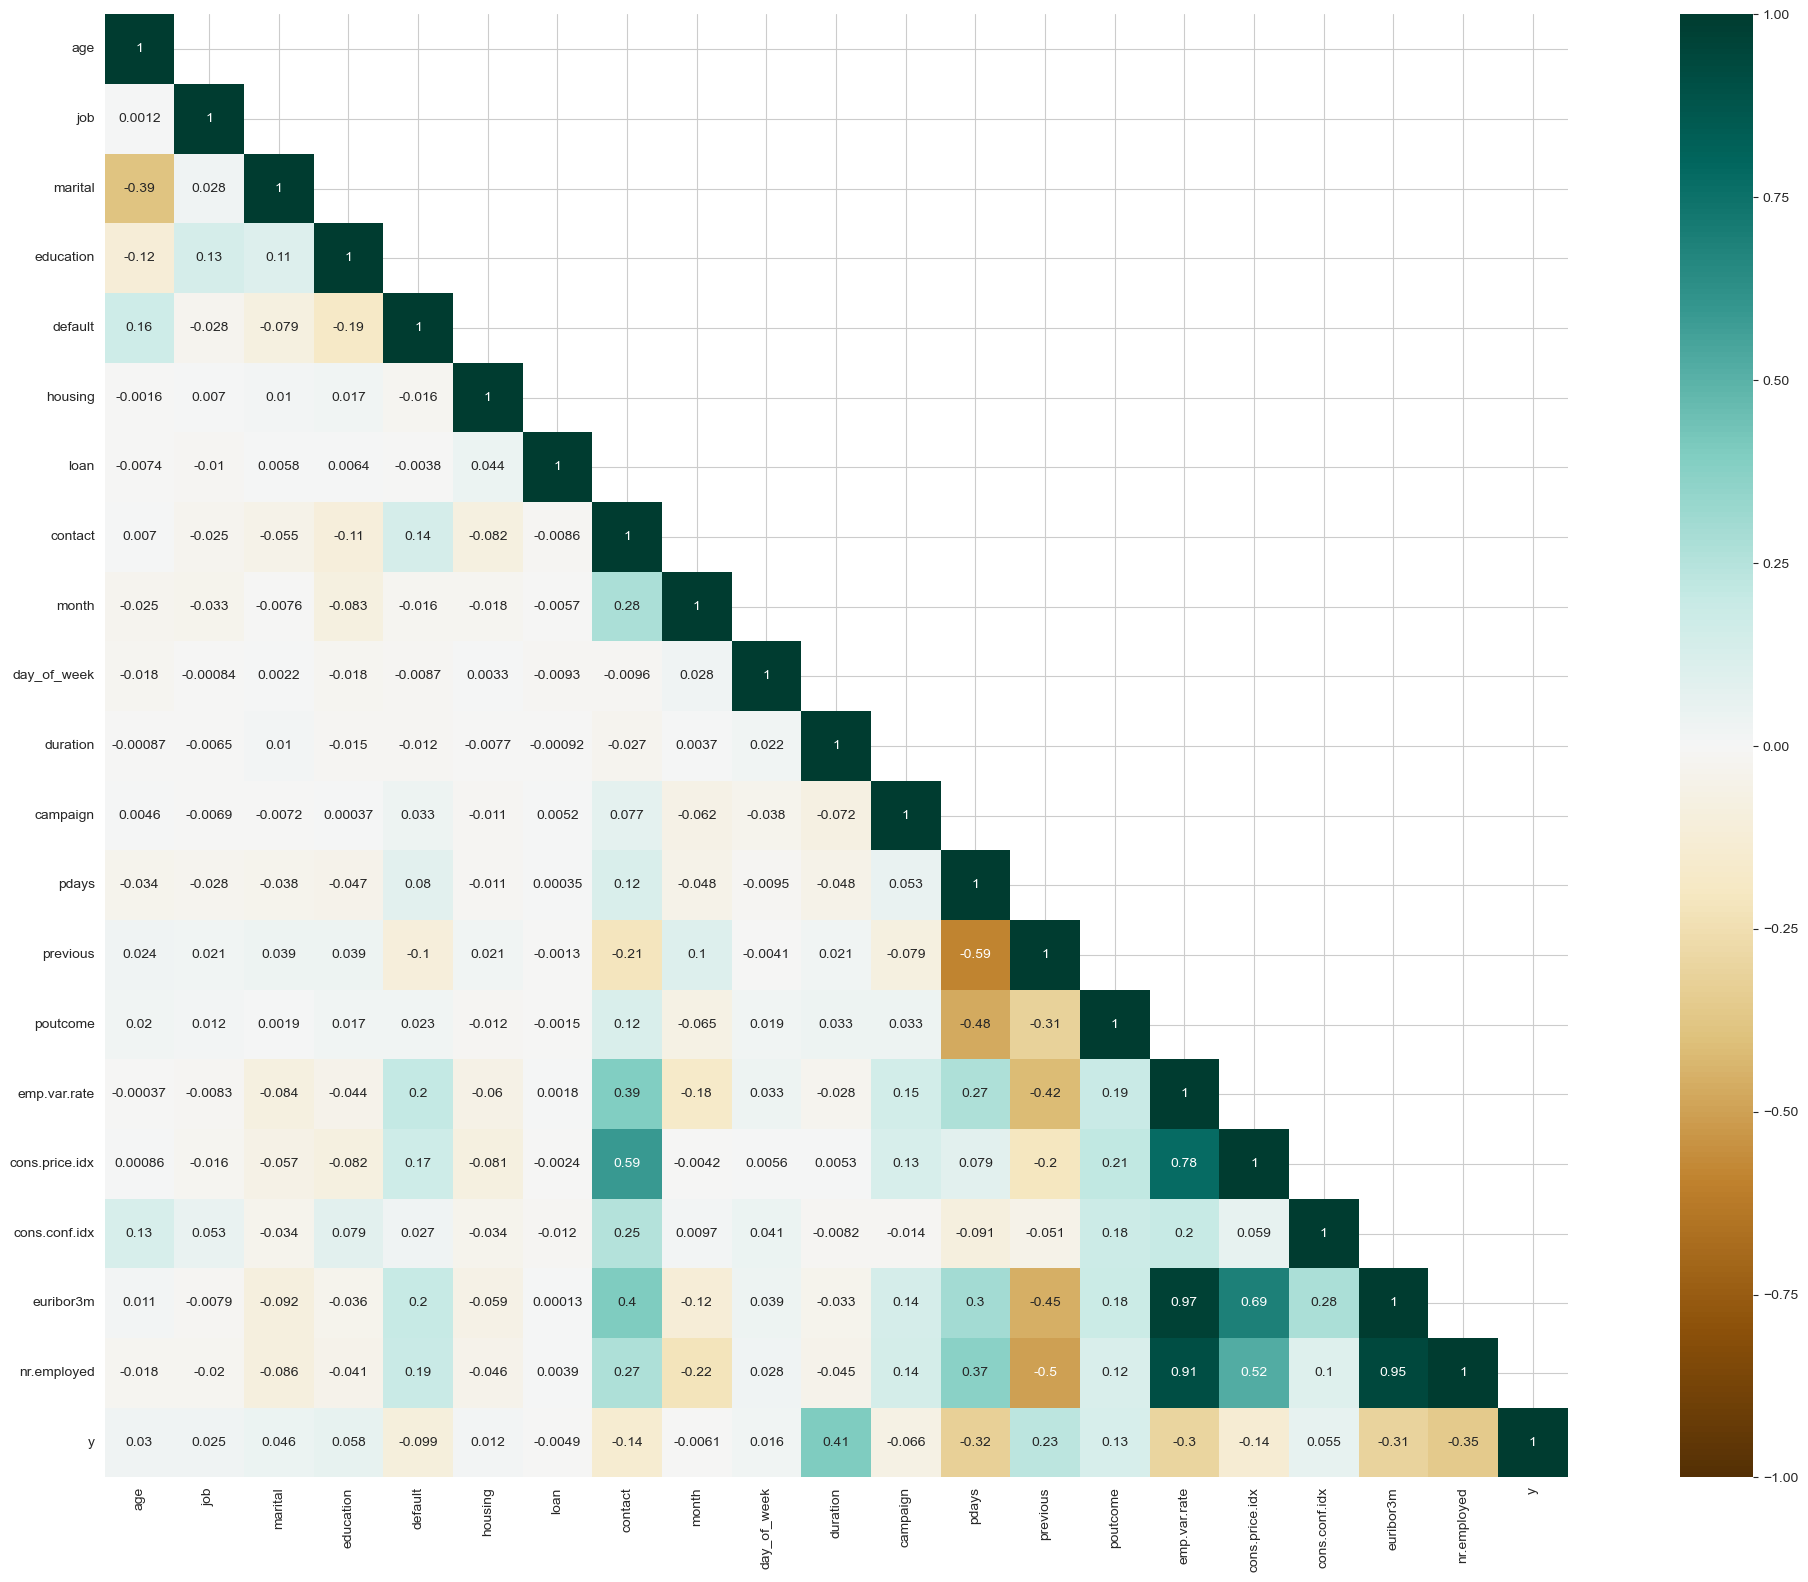

In [12]:
# Visualization of correlations (heatmap)
mask = np.triu(temp_data.corr(), 1)
plt.figure(figsize=(29, 19))
sns.heatmap(temp_data.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

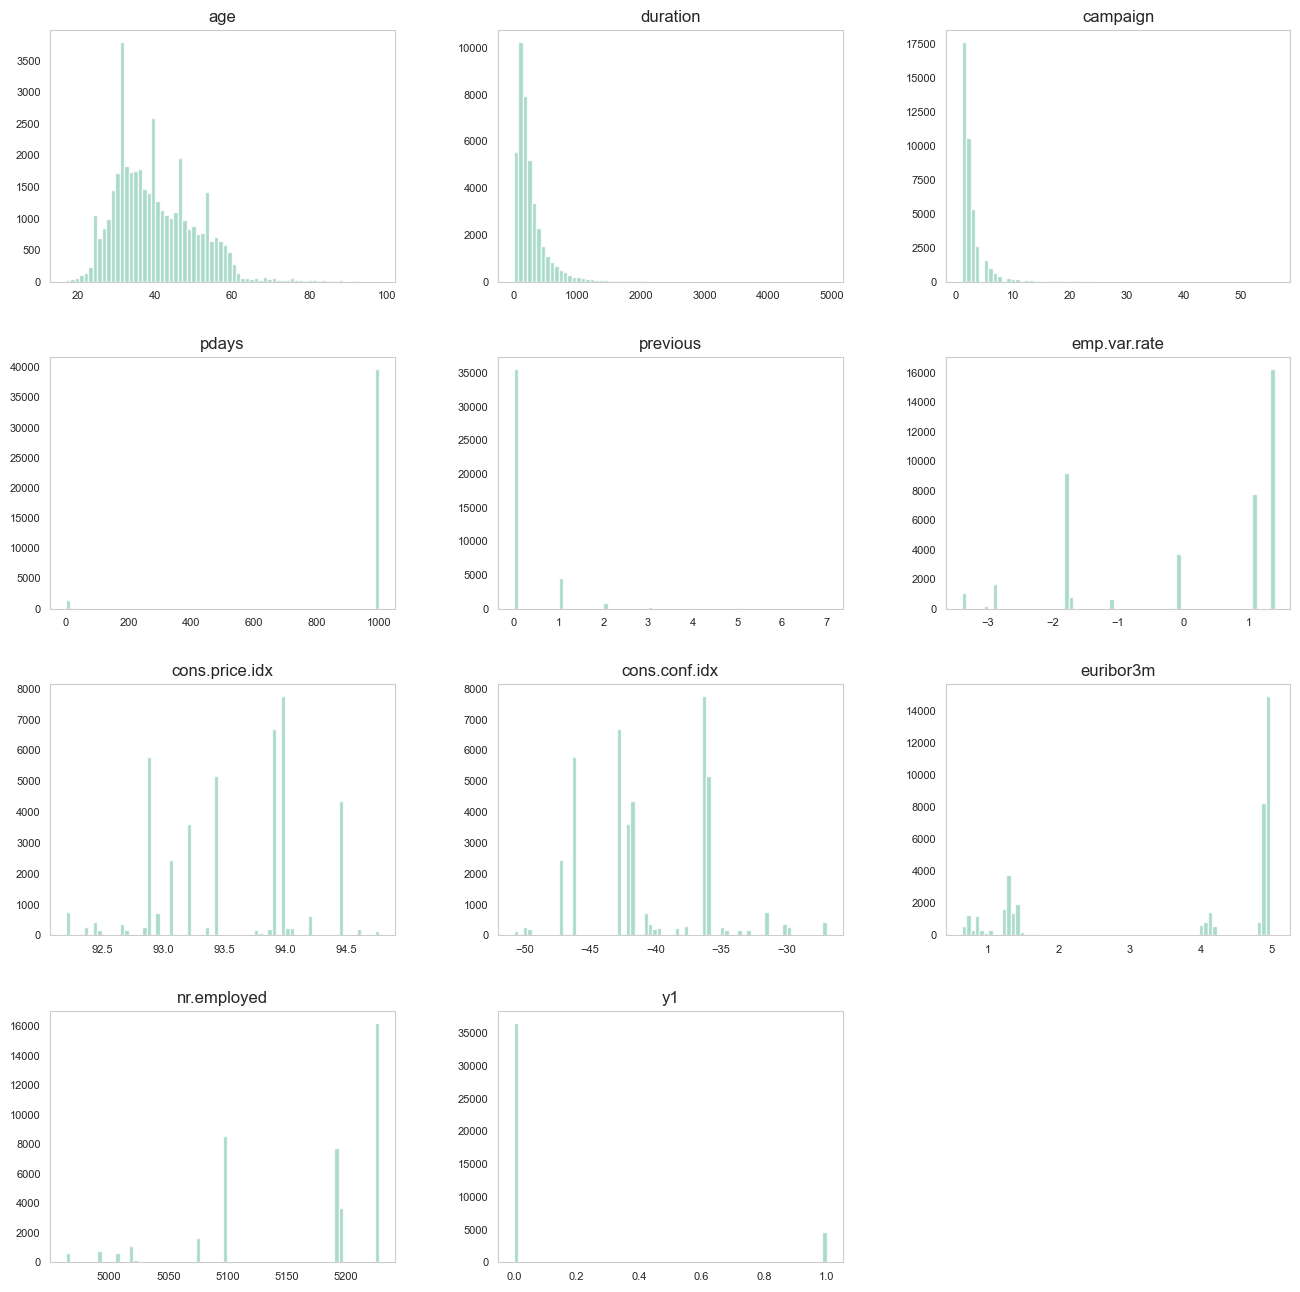

In [16]:
## Statistic description of numeric variables
df.hist(figsize=(16, 16), bins=70, xlabelsize=8, ylabelsize=8, alpha=0.8, grid=False)
plt.show()

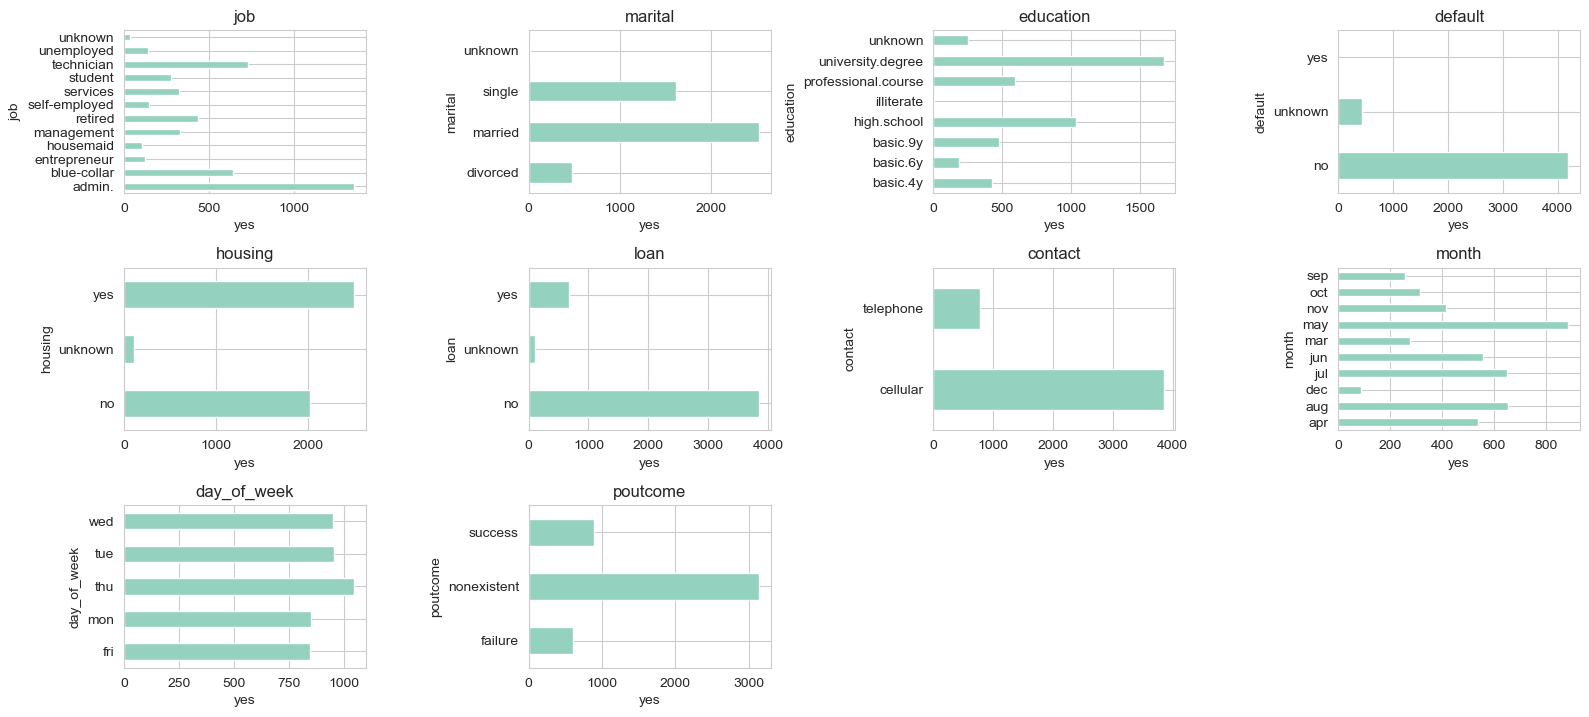

In [17]:
n = len(cate_cols)
i=1
plt.figure(figsize=(16,14))

df['y1']=0
df.loc[df['y'] == 'yes', 'y1'] = 1
#print(df.head(10))

for feature in cate_cols:
    if feature!='y':
        plt.subplot(round(n/2),round(n/3), i)
        df.groupby([feature])['y1'].sum().plot.barh()
        plt.xlabel('yes')
        plt.title(feature)
        i+=1

plt.tight_layout()
plt.show()

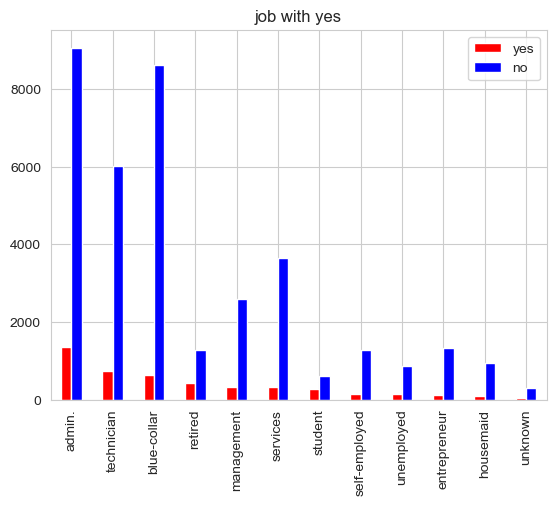

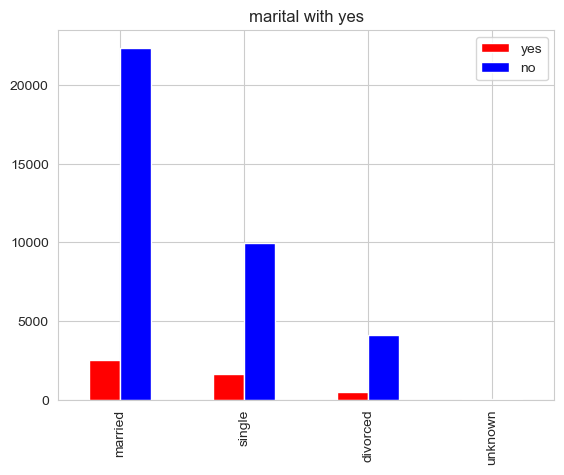

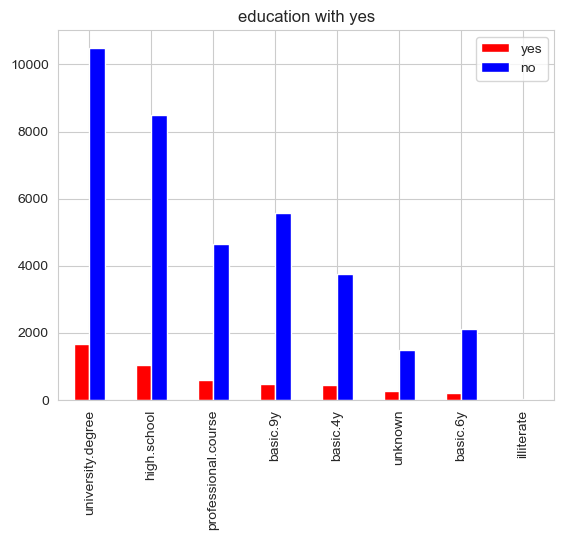

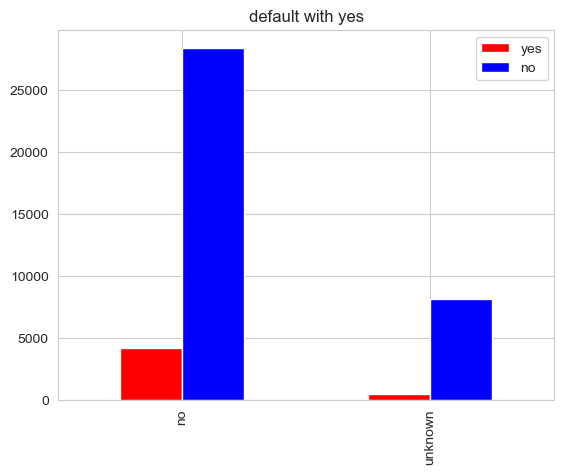

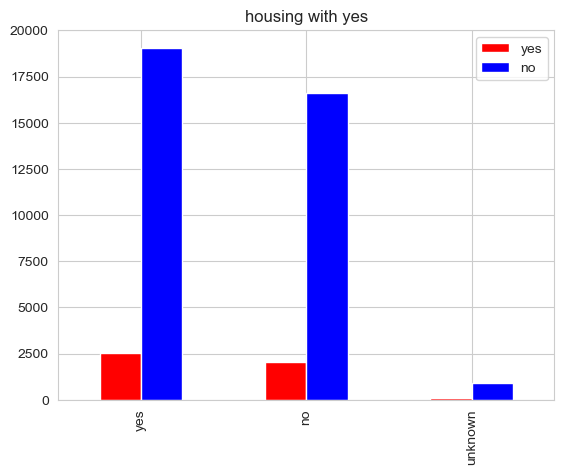

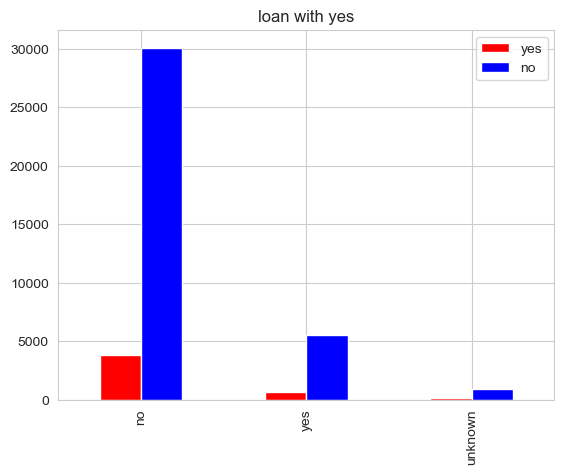

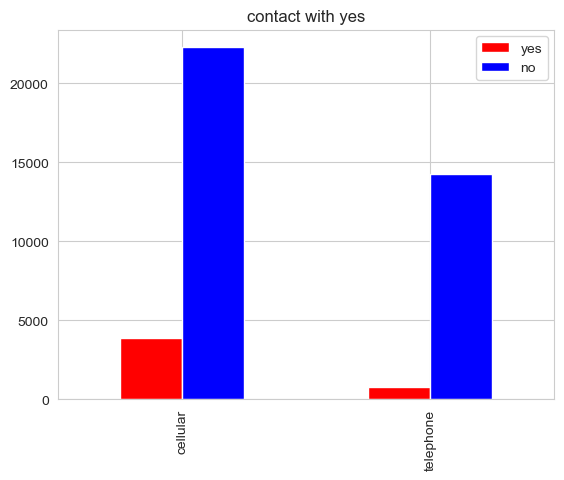

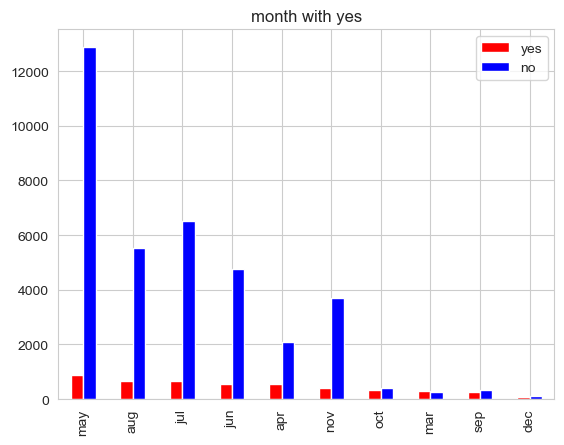

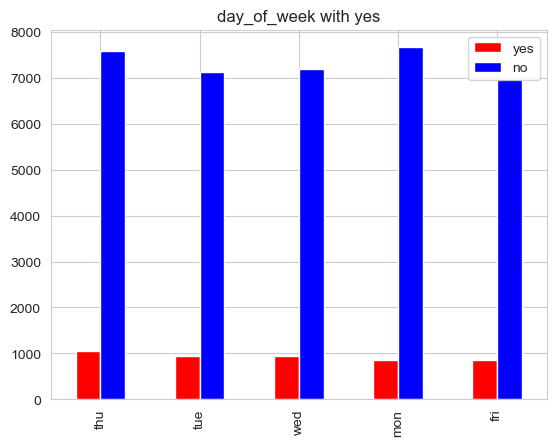

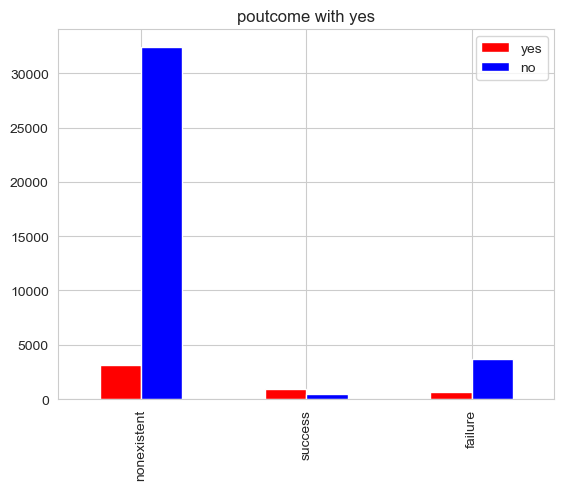

In [15]:
# Variables qualitatives based on categorial column with target lable according customer aging 

for col in cate_cols:
    #job and y
    if col !='y':
        j_data = pd.DataFrame()

        j_data['yes'] = df[df['y'] == 'yes'][col].value_counts()
        j_data['no'] = df[df['y'] == 'no'][col].value_counts()

        j_data.plot.bar(title = "{} with yes".format(col),color=['red','blue'] )
        #plt.savefig('job_y')

        

In [15]:

import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
import six
import sys
sys.modules['sklearn.externals.six'] = six
import matplotlib.pyplot as plt


#### Exploring AGE feature

Variable: 'age'
Discription: clients' age
Type of variable: int64
Type of distribution: continuous
Total observations: 41188
Missing values: 0
Unique values: 78
Min: 17
25%: 32
Median: 38.0
75%: 47
Max: 98
Mean: 40.02406040594348
Std dev: 10.421249980934235
Variance: 108.60245116512178
Skewness: 0.7846682380932289
Kurtosis: 0.7910698035273853



/var/folders/dr/gft2jpg15tx8f6_jbkw56b580000gn/T/ipykernel_70772/2396747108.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age, ax=ax_hist)


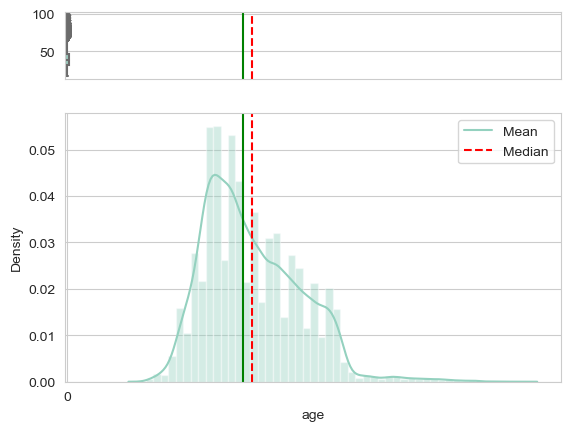

Percentiles 1%, 5%, 95%, 99%


0.01    23.0
0.05    26.0
0.95    58.0
0.99    71.0
Name: age, dtype: float64

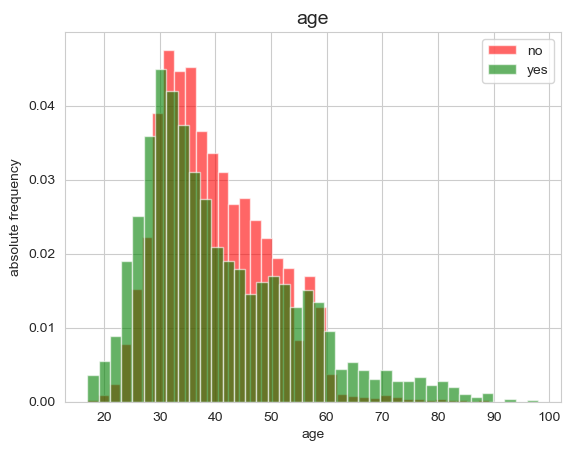

In [16]:
print("Variable: 'age'")
print("Discription: clients' age")
print(f"Type of variable: {df.age.dtype}")
print(f"Type of distribution: continuous")
print(f"Total observations: {df.age.shape[0]}")
print(f"Missing values: {df.age.isnull().sum()}")
print(f"Unique values: {df.age.nunique()}")
print(f"Min: {df.age.min()}")
print(f"25%: {int(df.age.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.age.median()}")
print(f"75%: {int(df.age.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.age.max()}")
print(f"Mean: {df.age.mean()}")
print(f"Std dev: {df.age.std()}")
print(f"Variance: {df.age.var()}")
print(f"Skewness: {scipy.stats.skew(df.age)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.age)}")
print("")

# Visualization of 'age'
age = df.age
np.array(age).mean()
np.median(age)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(age).mean()
median=np.median(age)

sns.boxplot(age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(age, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.age.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization variable vs. target
age_0 = df[df.y == 'no'].iloc[:,:1]
age_1 = df[df.y == 'yes'].iloc[:,:1]

a = np.array(age_0)
b = np.array(age_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, density=True, color="r", alpha = 0.6, label='no')
plt.hist(b, bins=40, density=True, color="g", alpha = 0.6, label='yes')
plt.legend(loc='upper right')
plt.title('age', fontsize=14)
plt.xlabel('age')
plt.ylabel('absolute frequency')
plt.show()


#### Removing Outliers and Missing Values for numeric variables       


In [17]:
# Removing Target and making a copy
#data_e1 = df.drop(["y","y1"], axis=1).copy()
data_e1 = df.copy()



In [18]:
for column in num_cols:
    try:
        if col !='y' and col !='y1':
            #print('processing column :', col)
            median = data_e1[column].quantile()
            iqr_1_5 = (data_e1[column].quantile(q = 0.75) - data_e1[column].quantile(q = 0.25)) * 1.5
            outliers = data_e1[(data_e1[column]< median - iqr_1_5) | (data_e1[column] > median + iqr_1_5)][column].count()
            outliers_pct = round(outliers / data_e1[column].count() * 100, 1)
            print("'{}' = {} ({}%) outliers".format(column, outliers, outliers_pct))
    except:
         print('\t skipped column :', column)

	 skipped column : euribor3m
	 skipped column : nr.employed


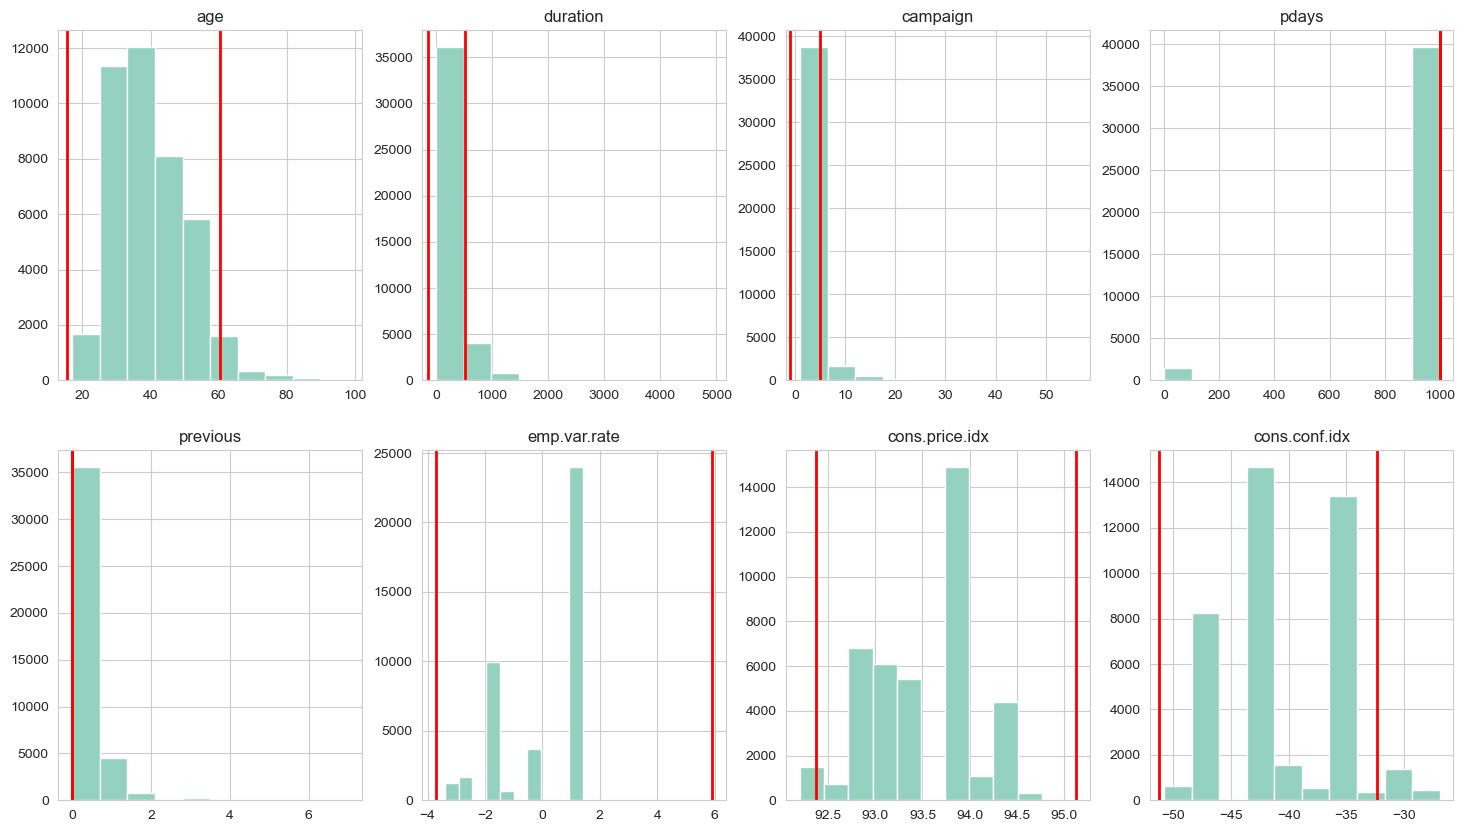

In [19]:
fig, ax  = plt.subplots(figsize = (18,10))
ax.axis("off")
v = 1
for column in num_cols:
    try:
        ax1 = fig.add_subplot(2,4,v)
        plt.hist(data_e1[column])
        ax1.set_title(column)
        v+=1
        median = data_e1[column].quantile()
        iqr_1_5 = (data_e1[column].quantile(q = 0.75) - data_e1[column].quantile(q = 0.25)) * 1.5
        outliers = data_e1[(data_e1[column]< median - iqr_1_5) | (data_e1[column] > median + iqr_1_5)][column].count()
        ax1.axvline(median - iqr_1_5, color='red', linewidth=2)  
        ax1.axvline(median + iqr_1_5, color='red', linewidth=2)  
    except:
        print('\t skipped column :', column)
plt.show()

### Problem 5: Engineering Features

Now understanding our business objective, we will build a basic model to get started. Before we can do this, we must work to encode the data .<b> Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.</b>

Unique values: 11


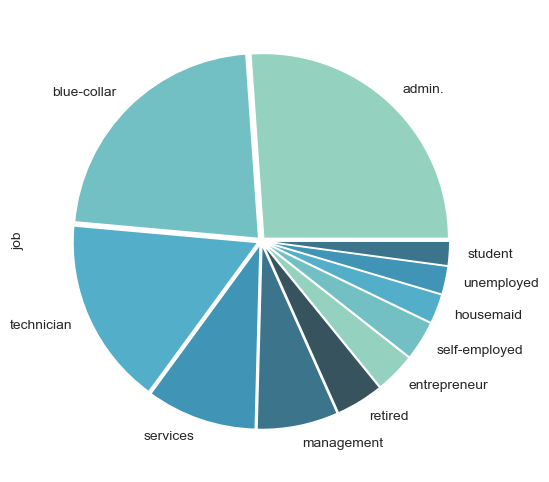

In [20]:
# Replacing 'unknown' by NaN
data_e1.job.replace(to_replace="unknown", value=np.nan, inplace=True)
# fill by NaN by near neighbord 
data_e1['job'] = data_e1.job.fillna(data_e1.job.value_counts().index[0])
# Confirming and visualizing of "job"
data_e1.job.value_counts(dropna=False).plot(kind='pie', figsize=(10,6), 
                                           explode=(0.02, 0.02, 0.02, 0.02, 
                                                    0.02, 0.02, 0.02, 0.02,
                                                    0.02, 0.02, 0.02));
print(f"Unique values: {data_e1.job.nunique()}")

Unique values: 3



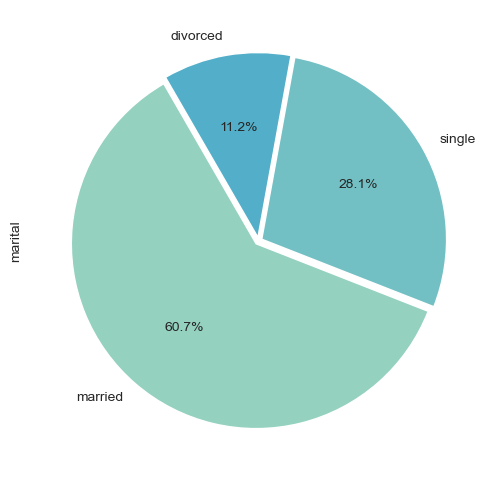

In [21]:
# Replacing 'unknown' by NaN
data_e1.marital.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
data_e1['marital'] = data_e1.marital.fillna(data_e1.marital.value_counts().index[0])

# Graph "pie"
data_e1['marital'].value_counts(dropna=False).plot(kind='pie', figsize=(10,6),
                                              explode = (0.02, 0.02, 0.02),
                                              autopct='%1.1f%%',
                                              startangle=120);
print(f"Unique values: {data_e1.marital.nunique()}")
print("")

### Drop features that are not required to build our model

In [22]:
# encoding object column
from sklearn.preprocessing import LabelEncoder
data_e2 = data_e1.copy()
for col in cate_cols:    
    encoder = LabelEncoder()
    data_e2[c
            ol] = encoder.fit_transform(data_e2[col])
  

In [23]:
data_e2.shape

(41188, 22)

In [24]:
data_e2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y1
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
5,45,7,1,2,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
7,41,1,1,7,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
8,24,9,2,5,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
9,25,7,2,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0


In [25]:
data_e2.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
y1                  int64
dtype: object

In [26]:
# Subdivision of the target
y_set = data_e2.y
X_set = data_e2.drop(["y","y1"], axis= "columns")


In [27]:
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(X_set.corrwith(y_set)).sort_values(ascending=False)[1:])


--Correated Features with target variable--

nr.employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp.var.rate      0.298334
previous          0.230181
contact           0.144773
cons.price.idx    0.136211
poutcome          0.129789
default           0.099352
campaign          0.066357
education         0.057799
cons.conf.idx     0.054878
marital           0.045849
age               0.030399
job               0.025482
day_of_week       0.015967
housing           0.011552
month             0.006065
loan              0.004909
dtype: float64


In [28]:
# Identifying all variables with great predictive power (Pearson Correlation p-value)
dataframe = pd.DataFrame(
    [scipy.stats.pearsonr(X_set[col], y_set) for col in X_set.columns],
    columns=["Pearson Corr.", "p-value"],
    index=X_set.columns,
).round(2).sort_values(by="p-value", ascending=False)

display(dataframe)

,Pearson Corr.,p-value
loan,-0.00,0.32
month,-0.01,0.22
housing,0.01,0.02
age,0.03,0.00
pdays,-0.32,0.00
euribor3m,-0.31,0.00
cons.conf.idx,0.05,0.00
cons.price.idx,-0.14,0.00
emp.var.rate,-0.30,0.00
poutcome,0.13,0.00


In [29]:
# Identifying columns in which p-value > 0.05
column = []
for item in dataframe.index:
    if dataframe['p-value'][item] > 0.05 or dataframe['p-value'][item] == 'NaN':
        column.append(item)
print(column)

['loan', 'month']


In [30]:
# Removing statistically non significant columns
data_e2.drop(column, axis=1, inplace=True)

In [31]:
data_e2.shape

(41188, 20)

In [32]:
data_e2.head(10)

,age,job,marital,education,default,housing,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y1
0,56,3,1,0,0,0,1,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,1,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,7,1,3,0,2,1,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,1,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,1,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
5,45,7,1,2,1,0,1,1,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
6,59,0,1,5,0,0,1,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
7,41,1,1,7,1,0,1,1,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
8,24,9,2,5,0,2,1,1,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
9,25,7,2,3,0,2,1,1,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0


In [33]:
data_e2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'contact',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'y1'],
      dtype='object')

In [34]:

#from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from IPython.display import Image
from sklearn.naive_bayes import GaussianNB

import time
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [35]:
seed = 123
# Dividing the dataset in train (80%) and test (20%)
train_set_rl, test_set_rl = train_test_split(data_e2, test_size = 0.2, random_state = seed)

X_train_rl = train_set_rl.drop(['y','y1'], axis = 1)
y_train_rl = train_set_rl['y']

X_test_rl = test_set_rl.drop(['y','y1'], axis = 1)
y_test_rl = test_set_rl['y']

In [36]:
# Normalization of the train and test data
scaler_rl = MinMaxScaler()
features_names = X_train_rl.columns

X_train_rl = scaler_rl.fit_transform(X_train_rl)
X_train_rl = pd.DataFrame(X_train_rl, columns = features_names)

X_test_rl = scaler_rl.transform(X_test_rl)
X_test_rl = pd.DataFrame(X_test_rl, columns = features_names) 




In [37]:
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(X_train_rl.corrwith(y_train_rl)).sort_values(ascending=False)[1:])


--Correated Features with target variable--

duration          0.008916
cons.price.idx    0.008880
marital           0.005287
education         0.004908
default           0.004506
poutcome          0.003953
emp.var.rate      0.003556
campaign          0.003041
job               0.002976
previous          0.002702
housing           0.002257
day_of_week       0.002196
cons.conf.idx     0.001703
pdays             0.001691
euribor3m         0.001280
nr.employed       0.001082
contact           0.000076
dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat? We will select two models: Logistic Regression and Decision Tree and compare them in Problem 8, then we choose one of them for further analysis and turning algorithm.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data. 

In [38]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train_rl, y_train_rl)

CPU times: user 12.1 s, sys: 3.28 s, total: 15.4 s
Wall time: 4.1 s


In [39]:
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=123),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [40]:
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=123),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [41]:
clf_lr.best_estimator_

LogisticRegression(C=10, class_weight='balanced', max_iter=500,
                   random_state=123)

In [42]:
clf_lr.best_estimator_.C

10

In [43]:
clf_lr.best_score_

0.8547192716236724

In [44]:
### Assuming all bad customers
y_preds_all_bad = np.zeros(y_test_rl.shape)
y_preds_all_bad
tn, fp, fn, tp = confusion_matrix(y_test_rl, y_preds_all_bad).ravel()
print(f'''
Number of True Negatives: {tn}
Number of True Positives: {tp}
Number of False Negatives: {fn}
Number of False Positives: {fp}
''')

print(confusion_matrix(y_test_rl, y_preds_all_bad))


Number of True Negatives: 7298
Number of True Positives: 0
Number of False Negatives: 940
Number of False Positives: 0

[[7298    0]
 [ 940    0]]


In [45]:
#### Assuming all good customers
y_preds_all_good = np.ones(y_test_rl.shape)
y_preds_all_good
tn, fp, fn, tp = confusion_matrix(y_test_rl, y_preds_all_good).ravel()

print("")
print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)
print("")
print(confusion_matrix(y_test_rl, y_preds_all_good))



Number of True Negatives: 0
Number of True Positives: 940
Number of False Negatives: 0
Number of False Positives: 7298

[[   0 7298]
 [   0  940]]


In [46]:
### ROC Curve: Area Under the Curve

def auc_roc_plot(y_test, y_preds):

    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)
    
    print(roc_auc)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

0.9343168924158761


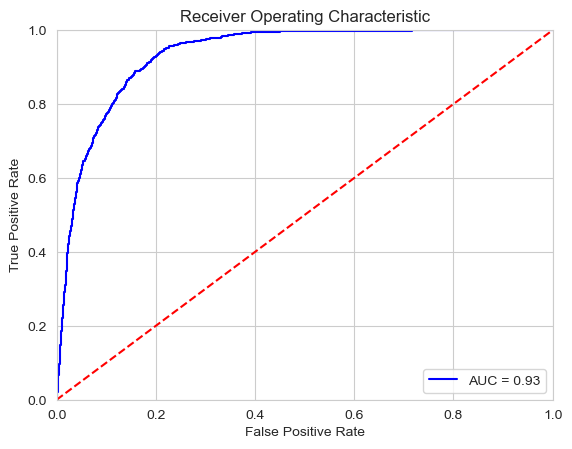

In [47]:
y_preds_rl = clf_lr.predict_proba(X_test_rl)[:,1]
auc_roc_plot(y_test_rl, y_preds_rl)

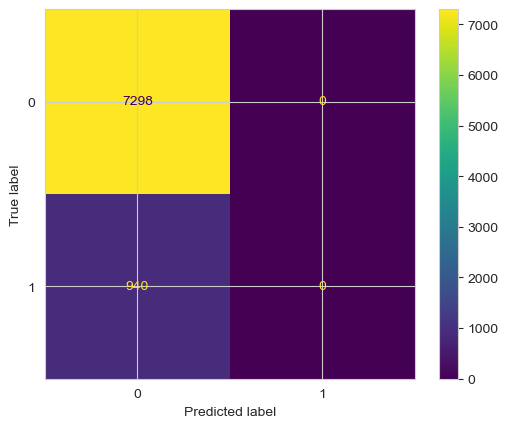

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix display
cm = confusion_matrix(y_test_rl.astype('int32') , y_preds_rl.astype('int32') , labels=clf_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_lr.classes_)
disp.plot()
plt.show()

In [49]:
#pip install scikit-learn==1.3.1

## Decision Trees (DT)


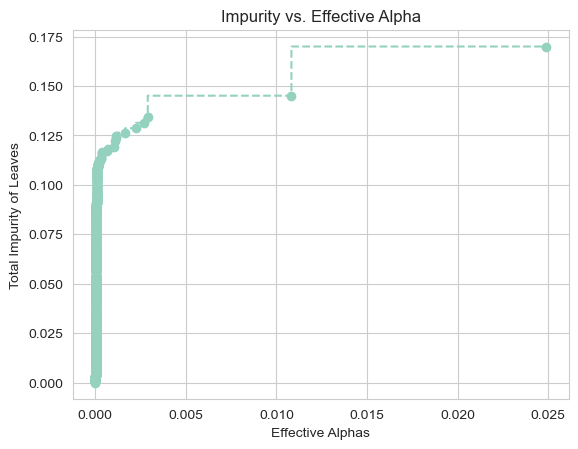

In [50]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
seed =500
dtree = DecisionTreeClassifier(random_state = 500).fit(X_train_rl, y_train_rl)
path = dtree.cost_complexity_pruning_path(X_train_rl, y_train_rl)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

plt.step(ccp_alphas[:-1], impurities[:-1], '--o')
plt.title('Impurity vs. Effective Alpha')
plt.xlabel('Effective Alphas')
plt.ylabel('Total Impurity of Leaves');

0.7369321527903302


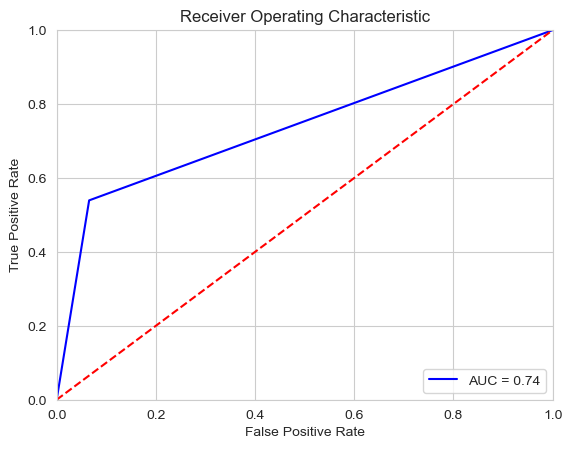

In [51]:
y_preds_dtree = dtree.predict_proba(X_test_rl)[:,1]
auc_roc_plot(y_test_rl, y_preds_dtree)

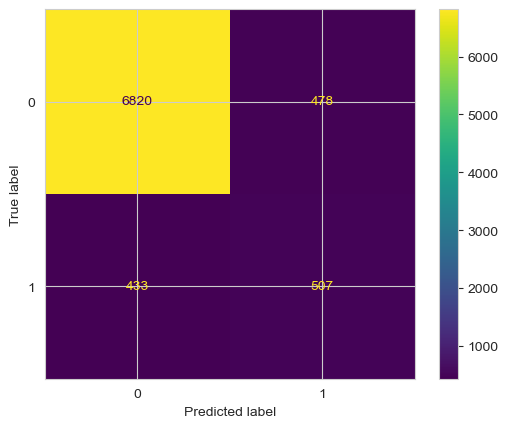

In [52]:
# Confusion Matrix display
cm = confusion_matrix(y_test_rl.astype('int32') , y_preds_dtree.astype('int32') , labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()
plt.show()

In [53]:
p_seed = 128
p_random_state =42
p_max_iter = 500
p_n_neighbors =100
p_max_depth =10

dict_classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(n_neighbors = p_n_neighbors),
    "Linear SVM": SVC(random_state=p_seed, class_weight='balanced',probability=True, verbose=True),
    "Decision Tree": tree.DecisionTreeClassifier(random_state = p_random_state,max_depth = p_max_depth),
    "LogisticRegression": LogisticRegression(max_iter = p_max_iter, solver = 'lbfgs', random_state = p_random_state, class_weight = 'balanced')
}

In [54]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, y_train,x_test_rl,y_test_rl, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.time()
        classifier.fit(X_train, y_train)
        t_end = time.time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
       
        predict_result = classifier.predict(x_test_rl)
        auc_roc_plot(y_test_rl, predict_result)
        
        test_score = accuracy_score(y_test_rl, predict_result)        
        df_results.loc[count,'test_score'] = test_score
        count+=1
        cm = confusion_matrix(y_test_rl.astype('int32') , predict_result.astype('int32') , labels=classifier.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
        disp.plot()
        plt.show()

    return df_results

trained Nearest Neighbors in 0.01 s
0.6024977697183139


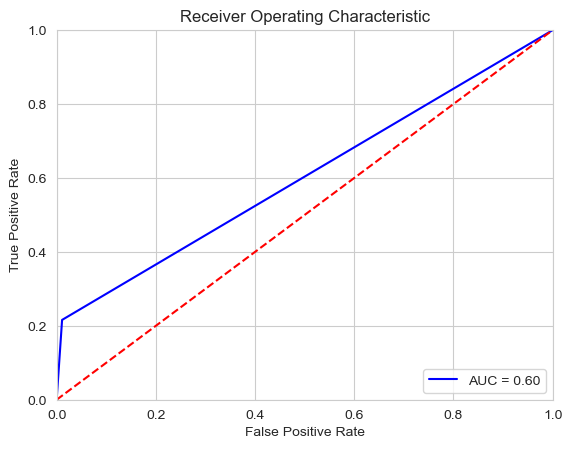

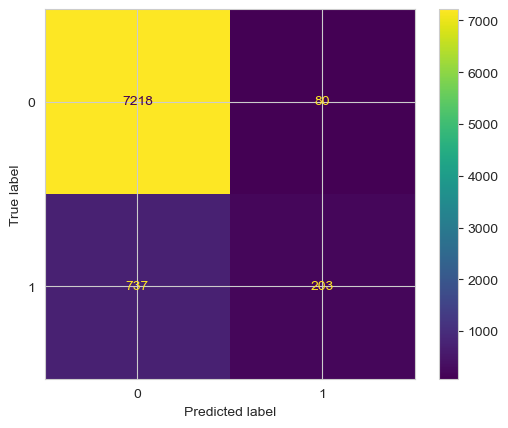

[LibSVM]..............*...*
optimization finished, #iter = 17080
obj = -9105.649918, rho = -1.053935
nSV = 10200, nBSV = 9129
Total nSV = 10200
..............*..*..*
optimization finished, #iter = 18654
obj = -9037.229249, rho = -1.026632
nSV = 10091, nBSV = 8988
Total nSV = 10091
..............*..*
optimization finished, #iter = 16636
obj = -8955.833546, rho = -1.131402
nSV = 10027, nBSV = 8985
Total nSV = 10027
..............*..*.*
optimization finished, #iter = 16696
obj = -8987.679373, rho = -1.045734
nSV = 10061, nBSV = 9005
Total nSV = 10061
..............*..*
optimization finished, #iter = 16397
obj = -9010.465616, rho = -1.029666
nSV = 10105, nBSV = 9056
Total nSV = 10105
................*...*.*
optimization finished, #iter = 19504
obj = -11118.414685, rho = 1.081346
nSV = 12317, nBSV = 10344
Total nSV = 12317
trained Linear SVM in 218.18 s
0.8773725532497973


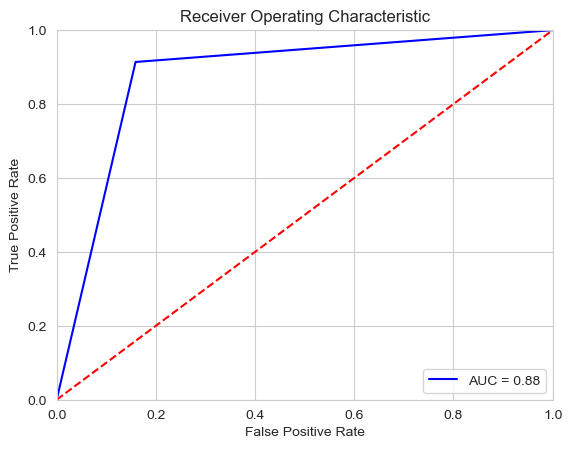

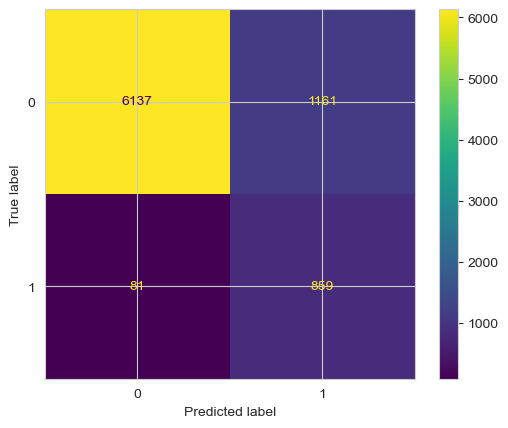

trained Decision Tree in 0.11 s
0.7595999778429531


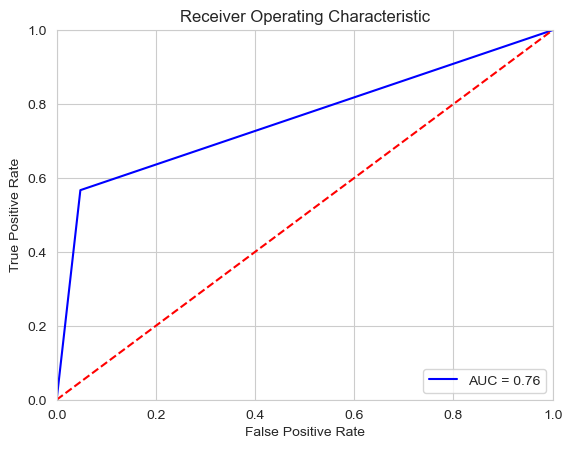

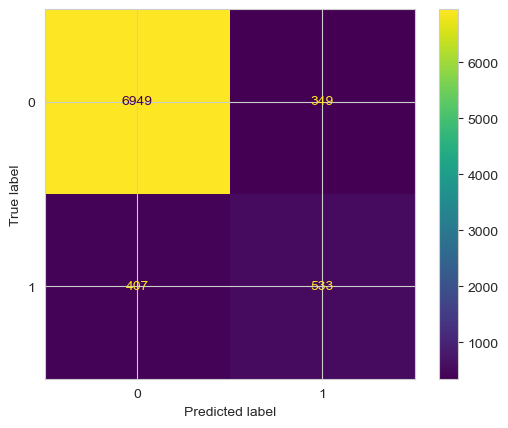

trained LogisticRegression in 0.24 s
0.8568743695445561


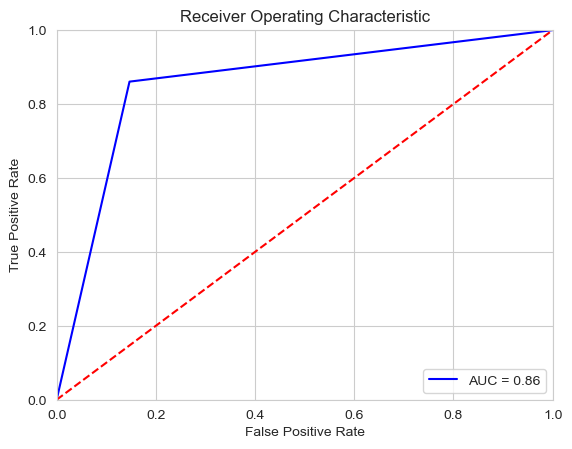

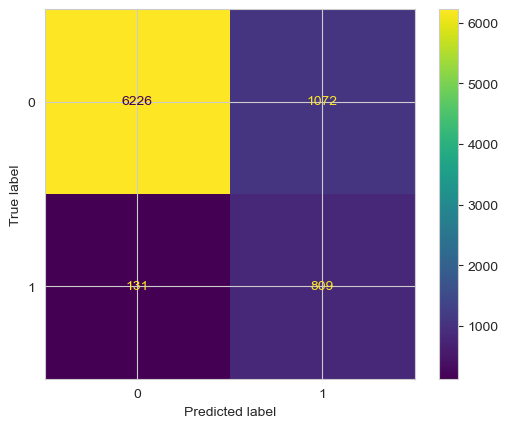

           classifier  train_score  training_time  test_score
2       Decision Tree     0.939272       0.106725    0.908230
0   Nearest Neighbors     0.899272       0.007382    0.900825
3  LogisticRegression     0.854962       0.238308    0.853969
1          Linear SVM     0.852170     218.175391    0.849235


In [55]:
# 1st train parameters for models 
p_seed = 128
p_random_state =42
p_max_iter = 500
p_n_neighbors =100
p_max_depth =10

df_results = batch_classify(X_train_rl, y_train_rl,X_test_rl,y_test_rl)
print(df_results.sort_values(by='train_score', ascending=False))

### Assessment model 1st test 
based on table of model train/test result above, thes best model selected with current approach are :  



### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.
- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [56]:
#X_train_rl = train_set_rl.drop(['y','y1'], axis = 1)
#y_train_rl = train_set_rl['y']

#X_test_rl = test_set_rl.drop(['y','y1'], axis = 1)
#y_test_rl = test_set_rl['y']

remove_features = ['job','day_of_week','housing']
X_train_r2 =X_train_rl.drop(remove_features,axis = 1) 
X_test_r2 =X_test_rl.drop(remove_features,axis = 1) 


In [57]:
X_train_rl.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'contact',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [58]:
# parameters for 1nd train models

#p_seed = 128
#p_random_state =42
#p_max_iter = 500
#p_n_neighbors =100
#p_max_depth =10

# CHange Model parameters with new dataset ( removed some features) remove_features = ['job','day_of_week','housing']
# parameters for 2nd train models
p_seed = 256
p_random_state =42
p_max_iter = 300
p_n_neighbors =150
p_max_depth =15



trained Nearest Neighbors in 0.04 s
0.6251160329556917


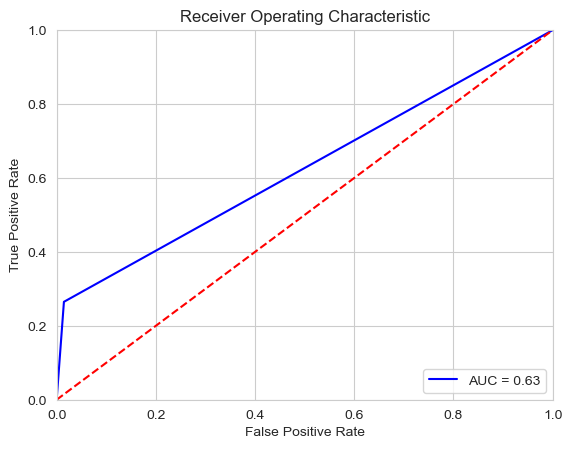

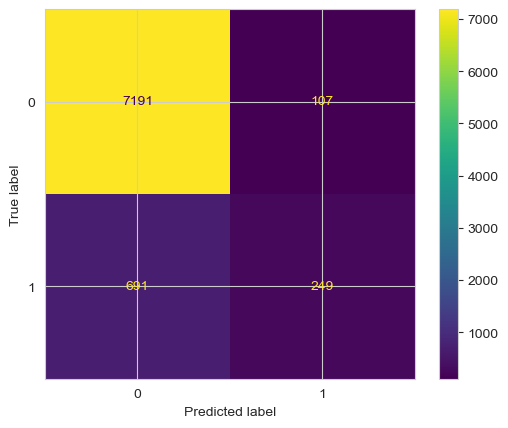

[LibSVM]............
*.*
optimization finished, #iter = 13808
obj = -8922.958556, rho = -0.945640
nSV = 9717, nBSV = 8800
Total nSV = 9717
............
*..*.*
optimization finished, #iter = 14651
obj = -8861.019702, rho = -0.957171
nSV = 9623, nBSV = 8683
Total nSV = 9623
............
*.*
optimization finished, #iter = 13635
obj = -8779.912146, rho = -0.849216
nSV = 9537, nBSV = 8624
Total nSV = 9537
............
*..*
optimization finished, #iter = 14013
obj = -8831.735466, rho = -0.883507
nSV = 9590, nBSV = 8628
Total nSV = 9590
............
*..*
optimization finished, #iter = 14009
obj = -8839.968463, rho = -0.945154
nSV = 9621, nBSV = 8708
Total nSV = 9621
..............
*..*..*
optimization finished, #iter = 17684
obj = -10914.187999, rho = 0.913829
nSV = 11790, nBSV = 9985
Total nSV = 11790
trained Linear SVM in 190.76 s
0.8783031492160487


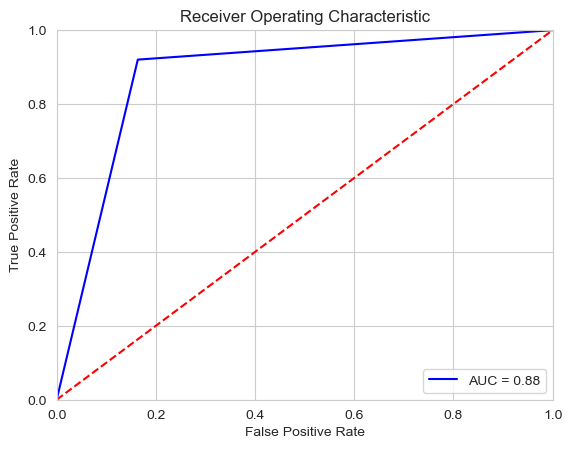

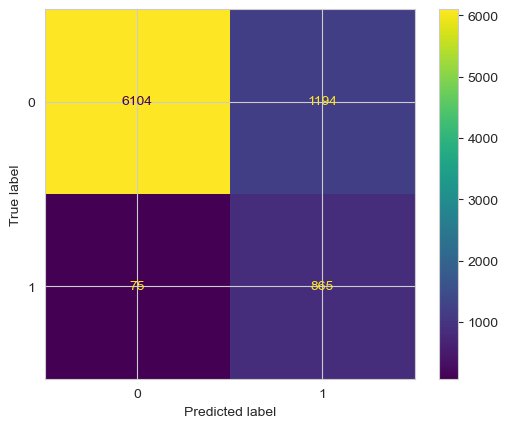

trained Decision Tree in 0.08 s
0.7422808930456029


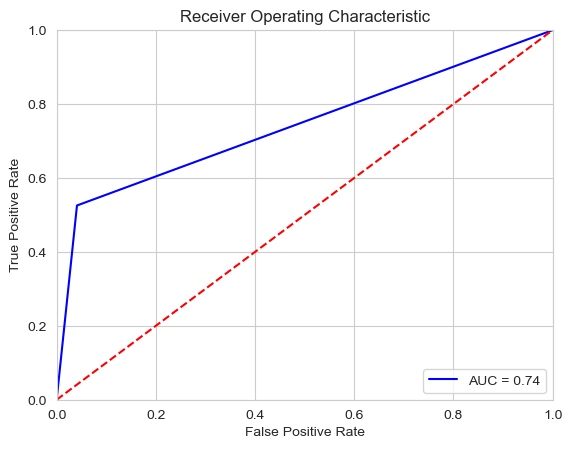

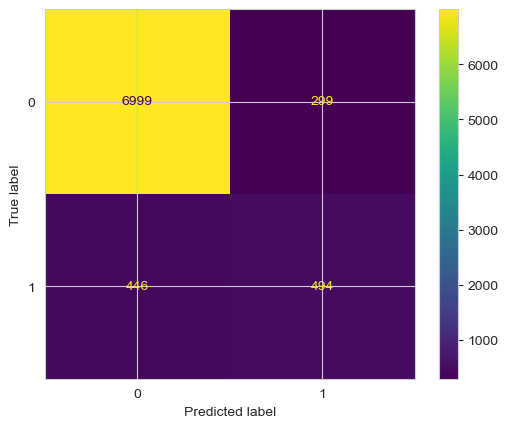

trained LogisticRegression in 0.19 s
0.8570799053077789


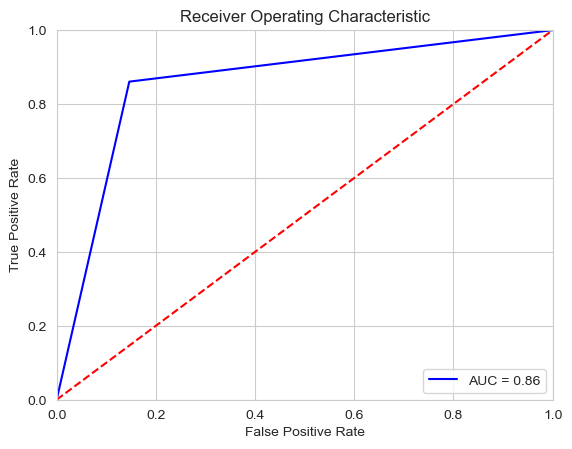

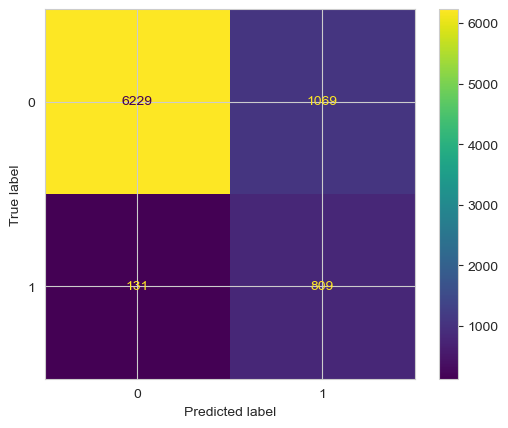

           classifier  train_score  training_time  test_score
2       Decision Tree     0.936419       0.084089    0.909565
0   Nearest Neighbors     0.900273       0.043807    0.903132
3  LogisticRegression     0.855083       0.190208    0.854334
1          Linear SVM     0.849499     190.758408    0.845958


In [59]:
df_results = batch_classify(X_train_r2, y_train_rl,X_test_r2,y_test_rl)
print(df_results.sort_values(by='train_score', ascending=False))

### Assessment model 2st test
based on table of model train/test result above, thes best model selected with current approach are :


### Recall score of models 1st test


### Problem 10: Model Comparisons in 2nd test

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  



# Conclusion 
</br>1. Reduced features based on correated with target not impacted score of model, so that computing performance better with score as well 
</br>2. Additional increase parameter for models  (p_seed = 256,p_max_iter = 300,p_n_neighbors =1500 ,p_max_depth =15 ) could get better score of models 
</br>3. Based on resuls above,<b> Decision Tree  classifier model are best choice with training time </b>
</br>4. Alternate model could be Linear SVM but traing time too long as LogisticRegression